# Figure 11



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

import sys

sys.path.append('../src')

from Config.config import PATHS

import warnings
warnings.filterwarnings("ignore")

In [2]:
from Utils.interaction import Performer
from Utils.indices import AlternationIndex
from Utils.utils import GetMeasurements, Grid
from Classes.cognitive_model_agents import FocalRegionAgent, FRAplus

In [3]:
fixed_parameters = {
	"num_agents": 6,
	"threshold": 0.5,
}
free_parameters = {
    'inverse_temperature': 20, 
    'bias': 0.44, 
    'learning_rate': 0.3, 
    'len_history': 1, 
    'delta': 0.02
}
simulation_parameters = {
	'num_rounds': 100,
    'num_episodes': 50,
	'verbose': False
}

In [4]:
df_list = []

for N in [2, 6]:
    for delta in [0, 0.1, 0.5]:
        if N == 2:
            lengths = [1 ,2]
        else:
            lengths = [1, 6]
        for len_history in lengths:
            free_parameters['delta'] = delta
            free_parameters['len_history'] = len_history                
            fixed_parameters['num_agents'] = N
            raw_df = Performer.sim(
                agent_class=FRAplus,
                fixed_parameters=fixed_parameters,
                free_parameters=free_parameters,
                simulation_parameters=simulation_parameters
            )
            raw_df['threshold'] = fixed_parameters['threshold']
            raw_df['num_agents'] = fixed_parameters['num_agents']
            raw_df['len_history'] = free_parameters['len_history']
            raw_df['delta'] = free_parameters['delta']
            raw_df['model'] = f"len_history={free_parameters['len_history']}; num_players={N}; delta={delta}"
            df_list.append(raw_df)

raw_df = pd.concat(df_list, ignore_index=True)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
df_FRAplus = raw_df.groupby(['num_agents', 'delta', 'len_history', 'id_sim', 'round'])['score'].mean().reset_index(name='score')
df_FRAplus['roll_score'] = df_FRAplus['score'].rolling(window=10).mean()

Text(0.5, 0.98, 'FRAplus (c=0.9)')

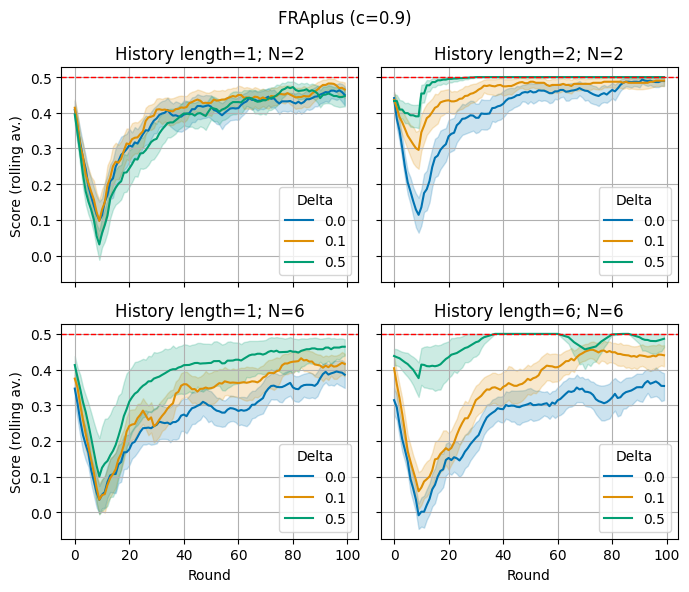

In [18]:
grid = Grid(4)
fig, axes = plt.subplots(
    grid.rows, grid.cols,
    figsize=(grid.cols * 3.5, grid.rows * 3),
    tight_layout=True,
    sharex=True, sharey=True    
)

sns.lineplot(
    x='round', y='roll_score', hue='delta', palette='colorblind',
    data=df_FRAplus[(df_FRAplus['len_history'] == 1) & (df_FRAplus['num_agents'] == 2)], 
    ax=axes[0, 0]
)
axes[0, 0].set_title('History length=1; N=2')
axes[0, 0].axhline(y=0.5, color='red', linestyle='--', linewidth=1)

sns.lineplot(
    x='round', y='roll_score', hue='delta', palette='colorblind',
    data=df_FRAplus[(df_FRAplus['len_history'] == 2) & (df_FRAplus['num_agents'] == 2)], 
    ax=axes[0, 1]
)
axes[0, 1].set_title('History length=2; N=2')
axes[0, 1].axhline(y=0.5, color='red', linestyle='--', linewidth=1)

sns.lineplot(
    x='round', y='roll_score', hue='delta', palette='colorblind',
    data=df_FRAplus[(df_FRAplus['len_history'] == 1) & (df_FRAplus['num_agents'] == 6)], 
    ax=axes[1, 0]
)
axes[1, 0].set_title('History length=1; N=6')
axes[1, 0].axhline(y=0.5, color='red', linestyle='--', linewidth=1)

sns.lineplot(
    x='round', y='roll_score', hue='delta', palette='colorblind',
    data=df_FRAplus[(df_FRAplus['len_history'] == 6) & (df_FRAplus['num_agents'] == 6)], 
    ax=axes[1, 1]
)
axes[1, 1].set_title('History length=6; N=6')
axes[1, 1].axhline(y=0.5, color='red', linestyle='--', linewidth=1)

for f, c in grid:
    axes[f, c].set_xlabel('Round')
    axes[f, c].set_ylabel('Score (rolling av.)')
    axes[f, c].legend(title='')
    axes[f, c].grid()
    axes[f, c].legend(title='Delta')

fig.suptitle('FRAplus (c=0.9)')


In [19]:
fig.savefig(PATHS['figures_for_paper'] / 'Figure11.png', dpi=300, bbox_inches='tight')

In [16]:
gm = GetMeasurements(raw_df, ['bounded_efficiency', 'inequality'])
idx = AlternationIndex.from_file()
df = gm.get_measurements()
df = idx.alt_precentage(df, columns=['model']).reset_index()
df['c'] = df['model'].apply(lambda x: x.split(';')[0].split('=')[1])
df['len_history'] = df['model'].apply(lambda x: x.split(';')[0].split('=')[1])
df['num_players'] = df['model'].apply(lambda x: x.split(';')[1].split('=')[1])
df['delta'] = df['model'].apply(lambda x: x.split(';')[2].split('=')[1])
df['alternation_percentage'] = df['alternation_percentage'] * 100
alt_table = pd.pivot_table(
    data=df,
    index=['delta'],
    values=['alternation_percentage'],
    columns=['num_players', 'len_history']
).fillna('-')
alt_table

alternation_percentage                
num_players                      2          6     
len_history                      1     2    1    6
delta                                             
0                             26.0  30.0  0.0  0.0
0.1                           22.0  52.0  0.0  0.0
0.5                           24.0  38.0  0.0  0.0

In [13]:
print(alt_table.to_latex())

\begin{tabular}{lrrr}
\toprule
 & \multicolumn{3}{r}{alternation_percentage} \\
len_history & 1 & 2 & 6 \\
delta &  &  &  \\
\midrule
0 & 13.000000 & 30.000000 & 0.000000 \\
0.1 & 11.000000 & 52.000000 & 0.000000 \\
0.5 & 12.000000 & 38.000000 & 0.000000 \\
\bottomrule
\end{tabular}



---